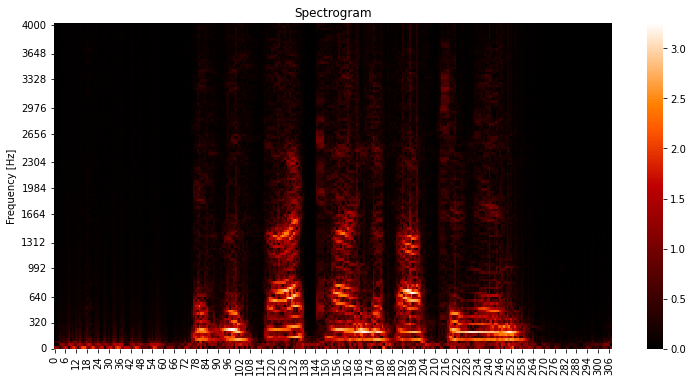

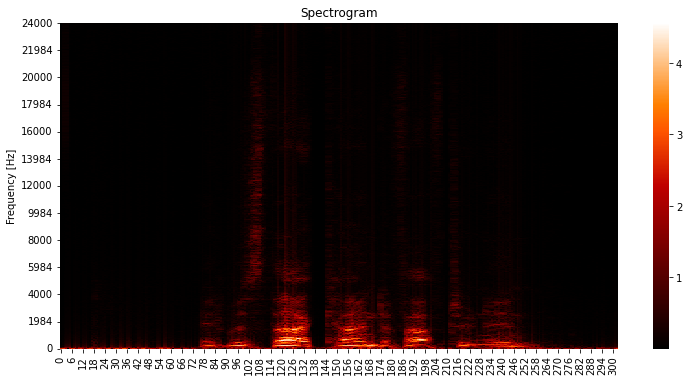

In [4]:
from importlib import reload
import main
import audio_utils
import baseline
import dataset
import models
import transforms
import data_module
import train

reload(audio_utils)
reload(baseline)
reload(dataset)
reload(models)
reload(transforms)
reload(data_module)
reload(train)
reload(main)

# main.main()
# hparams = {
#     "lr": 1e-3,
#     "batch_size": 1,
#     "stft_height": 751,
#     "stft_width": 64,
#     "n_fft": None,
#     "data_dir": "../data",
#     "wandb": True,
#     "num_blocks": 4,
#     "accelerator": "auto", 
#     #"gpus": -1, 
#     "auto_select_gpus": True, 
#     "log_n_samples": True, 
#     "num_workers": 0, 
#     "log_every_n_steps": 1, 
# }

# train.train_from_dict(hparams)

main.main()